In [1]:
!pip install sqlalchemy
!pip install psycopg2
!pip install psycopg2-binary

In [0]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings

import matplotlib.pyplot as plt

# import warnings
warnings.filterwarnings('ignore')

In [0]:
# Database credentials
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

# use the credentials to start a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

In [0]:
useduc=pd.read_sql_query('select * from useducation', con=engine)


engine.dispose()

In [5]:
useduc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [0]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]
states = useduc["STATE"].unique()

for state in states:
    useduc.loc[useduc["STATE"] == state, fill_list] = useduc.loc[useduc["STATE"] == state, fill_list].interpolate()

# we drop the null values after interpolation
useduc.dropna(inplace=True)

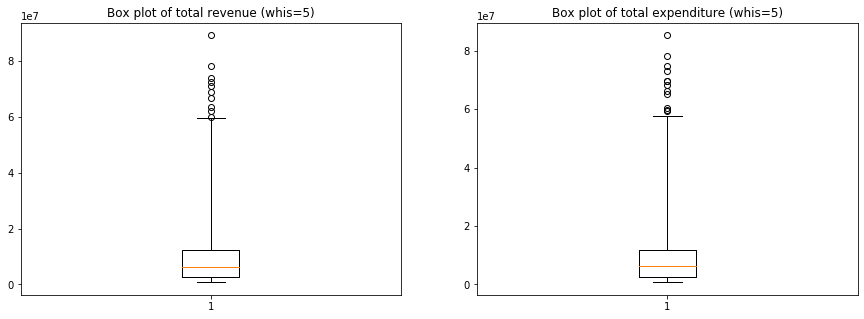

In [7]:
#1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?
# visually by using box plots
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.boxplot(useduc["TOTAL_REVENUE"], whis=5)
plt.title("Box plot of total revenue (whis=5)")

plt.subplot(1,2,2)
plt.boxplot(useduc["TOTAL_EXPENDITURE"], whis=5)
plt.title("Box plot of total expenditure (whis=5)")
plt.show()
#Yes we do have outliers

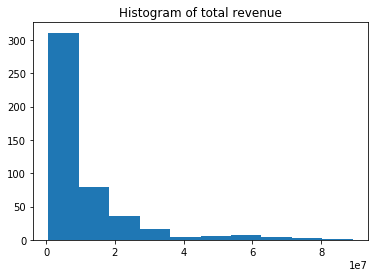

In [8]:
#Histogram for total revenue
plt.hist(useduc["TOTAL_REVENUE"])
plt.title("Histogram of total revenue")
plt.show()

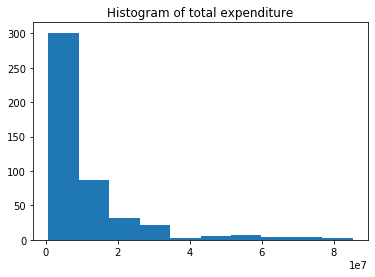

In [9]:
#Histogram for total expenditure
plt.hist(useduc["TOTAL_EXPENDITURE"])
plt.title("Histogram of total expenditure")
plt.show()

In [0]:
#2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you 
#learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

In [0]:
from scipy.stats.mstats import winsorize

# We apply one-way winsorization to the highest end
# of the value distribution. As we have a lot of extreme
# values, we set the values of the outliers to the 
# value of the 90th percentile. 
winsorized_total_revenue = winsorize(useduc["TOTAL_REVENUE"], (0, 0.05))
winsorized_total_expenditure = winsorize(useduc["TOTAL_EXPENDITURE"], (0, 0.05))


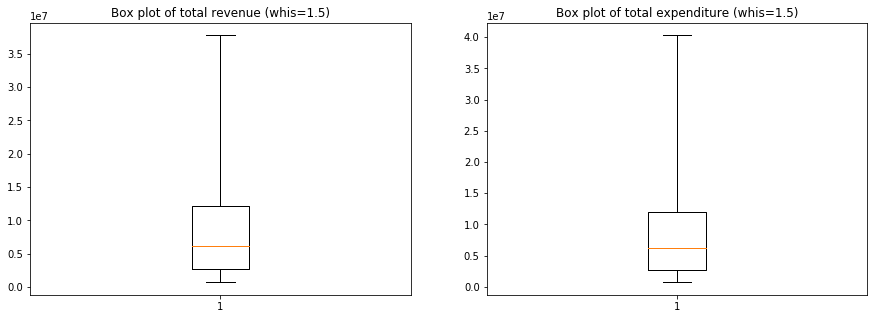

In [12]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.boxplot(winsorized_total_revenue, whis=5)
plt.title("Box plot of total revenue (whis=1.5)")

plt.subplot(1,2,2)
plt.boxplot(winsorized_total_expenditure, whis=5)
plt.title("Box plot of total expenditure (whis=1.5)")
plt.show()

In [0]:
#3.Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE 
#(before you eliminated the outliers). You can think of it as a kind of budget deficit in education. 
#Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.
BUDGET_DEFICIT=useduc.TOTAL_REVENUE-useduc.TOTAL_EXPENDITURE
#useduc["BUDGET_DEFICIT"]=useduc["TOTAL_REVENUE"]-useduc["TOTAL_EXPENDITURE"]

Text(0.5, 1.0, 'Box plot of budget deficit (whis=5)')

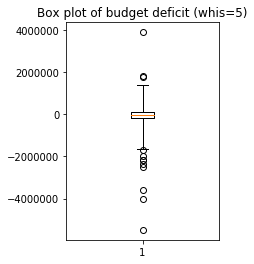

In [14]:
plt.subplot(1,2,1)
plt.boxplot(BUDGET_DEFICIT, whis=5)
plt.title("Box plot of budget deficit (whis=5)")

In [0]:
WINSORIZED_BUDGET_DEFICIT = winsorize(BUDGET_DEFICIT, (0.05, 0.05))


Text(0.5, 1.0, 'Box plot of winsorized budget deficit (whis=5)')

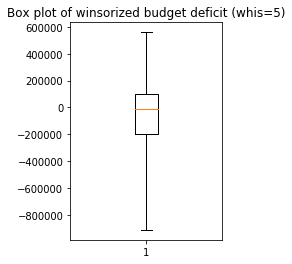

In [16]:
#check if it worked
plt.subplot(1,2,1)
plt.boxplot(WINSORIZED_BUDGET_DEFICIT, whis=5)
plt.title("Box plot of winsorized budget deficit (whis=5)")

Text(0.5, 1.0, 'Box plot of budget deficit 2 (whis=5)')

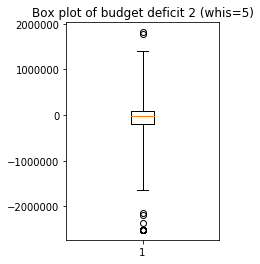

In [17]:
#4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. 
#This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE.
#In this newly created variable, can you find any outliers? If so, eliminate them.
BUDGET_DEFICIT_2=winsorized_total_revenue-winsorized_total_expenditure 
#Find outliers
plt.subplot(1,2,1)
plt.boxplot(BUDGET_DEFICIT_2, whis=5)
plt.title("Box plot of budget deficit 2 (whis=5)")


In [0]:
# Eliminate outliers
WINSORIZED_BUDGET_DEFICIT_2 = winsorize(BUDGET_DEFICIT_2, (0.05, 0.05))

Text(0.5, 1.0, 'Box plot of winsorized budget deficit 2 (whis=5)')

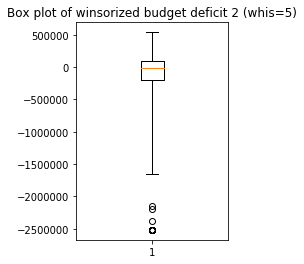

In [19]:
plt.subplot(1,2,1)
plt.boxplot(WINSORIZED_BUDGET_DEFICIT_2, whis=5)
plt.title("Box plot of winsorized budget deficit 2 (whis=5)")

In [0]:
# We use .1 at the bottom
WINSORIZED_BUDGET_DEFICIT_3 = winsorize(BUDGET_DEFICIT_2, (0.1, 0.05))

Text(0.5, 1.0, 'Box plot of winsorized budget deficit 2 (whis=5)')

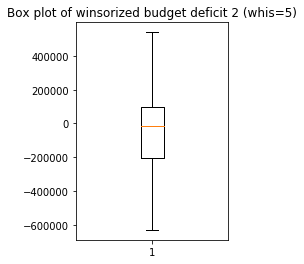

In [21]:
plt.subplot(1,2,1)
plt.boxplot(WINSORIZED_BUDGET_DEFICIT_3, whis=5)
plt.title("Box plot of winsorized budget deficit 2 (whis=5)")

In [0]:
#5. Compare some basic descriptive statistics of the budget variables 
#you end up with in the 3rd and the 4th questions. Do you see any differences?

In [23]:
# Here is the  distinction.
#Bugdet deficit is the original
#Winsorized budget deficit we winsorize the original
#Winsorized budget deficit 2 we get the winsorised income and wisorized expenditure


pd.DataFrame({"Original Budget":BUDGET_DEFICIT,"Winsorized Budget Def W Outliers":WINSORIZED_BUDGET_DEFICIT, "Winsorized Budget Def WOut Outliers":WINSORIZED_BUDGET_DEFICIT_2}).describe()

,Original Budget,Winsorized Budget Def W Outliers,Winsorized Budget Def WOut Outliers
count,4.660000e+02,466.000000,4.660000e+02
mean,-8.094882e+04,-58733.012876,-1.720532e+05
std,6.144222e+05,341300.816505,6.509561e+05
min,-5.487742e+06,-913765.000000,-2.518429e+06
25%,-1.965748e+05,-196574.750000,-2.047750e+05
50%,-8.872500e+03,-8872.500000,-1.282350e+04
75%,1.013948e+05,101394.750000,9.826300e+04
max,3.897129e+06,560511.000000,5.400550e+05


In [0]:
#Removing outliers significantly affects the statistics


In [0]:
#6. If our variable of interest is the budget deficit variable, which method do 
#you think is the appropriate in dealing with the outliers in this variable: 
#the method in the 3rd question or the one in the 4th question?
#The method in the 3rd question is more suitable coz the method in the 4th qn significantly \
#changed the statistics.